In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/WineQT.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Import Libraries

In [ ]:
!pip install Xgboost

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder , OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

Data Preprocessing

Checking Dataset

In [ ]:
df = pd.read_csv('/content/WineQT.csv')

In [ ]:
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
151,7.8,0.735,0.08,2.4,0.092,10.0,41.0,0.99740,3.24,0.71,9.8,6,214
735,7.1,0.430,0.17,1.8,0.082,27.0,51.0,0.99634,3.49,0.64,10.4,5,1047
162,5.2,0.480,0.04,1.6,0.054,19.0,106.0,0.99270,3.54,0.62,12.2,7,230
910,7.9,0.765,0.00,2.0,0.084,9.0,22.0,0.99619,3.33,0.68,10.9,6,1282
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1


Drop Unneccessary columns

In [ ]:
df = df.drop(['Id'],axis=1)

In [ ]:
df['quality'].value_counts()

,count
quality,
5,483
6,462
7,143
4,33
8,16
3,6


Checking For Missing Values

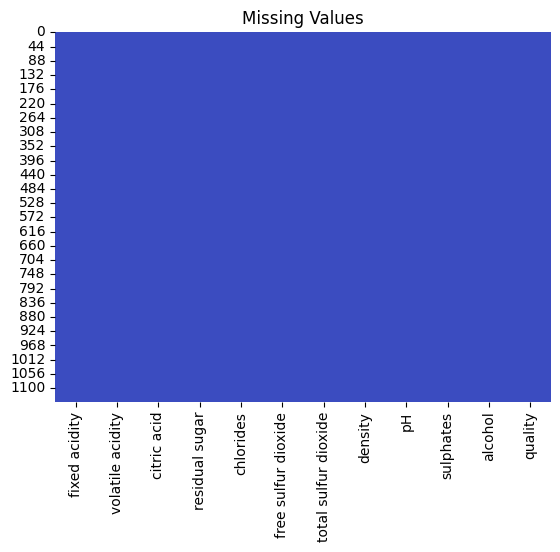

In [ ]:
sns.heatmap(df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Values')
plt.show()

Data Balancing

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [ ]:
x= df.drop(['quality'],axis=1)
y= df['quality']

In [ ]:
smote = SMOTE(random_state=42, k_neighbors=1)
x_sampled , y_sampled = smote.fit_resample(x,y)

In [ ]:
df_sampled = pd.DataFrame(x_sampled, columns=x.columns)

In [ ]:
df = pd.concat([df_sampled,y_sampled],axis=1)

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df['quality'].value_counts()

,count
quality,
5,483
6,483
7,483
4,483
8,483
3,483


Outlier Detection

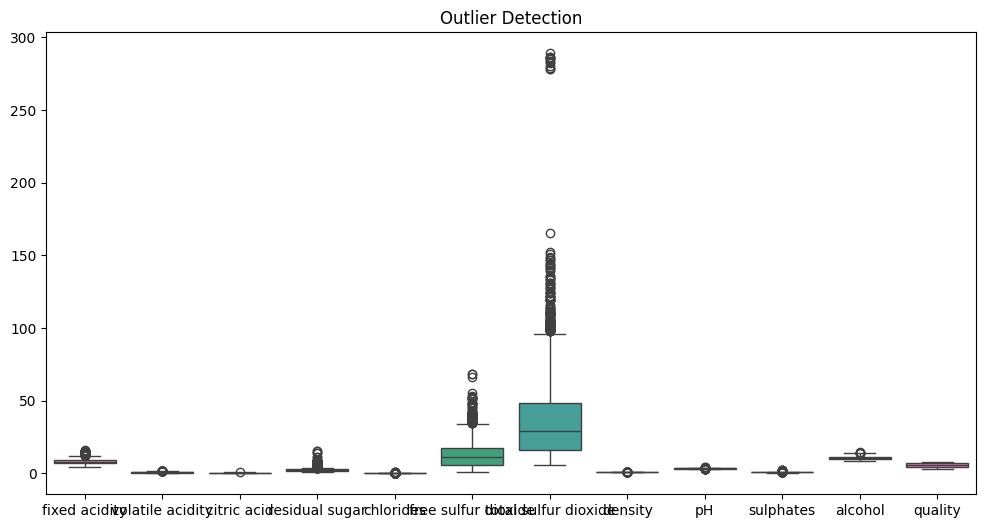

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.title('Outlier Detection')
plt.show()

In [ ]:
def Outlier_r(columns,df):

    for col in columns:

        Q1 = df[col].quantile(0.25)

        Q3 = df[col].quantile(0.75)



        IQR = Q3 - Q1



        lowerbound = Q1 - (1.5 * IQR)

        upperbound = Q3 + (1.5 * IQR)



        df = df[(df[col] >= lowerbound) & (df[col] <= upperbound)]

    return df

In [ ]:
x=df.drop(['quality'],axis=1)

In [ ]:
n_col = x.columns

In [ ]:
n_col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
df = Outlier_r(n_col,df)

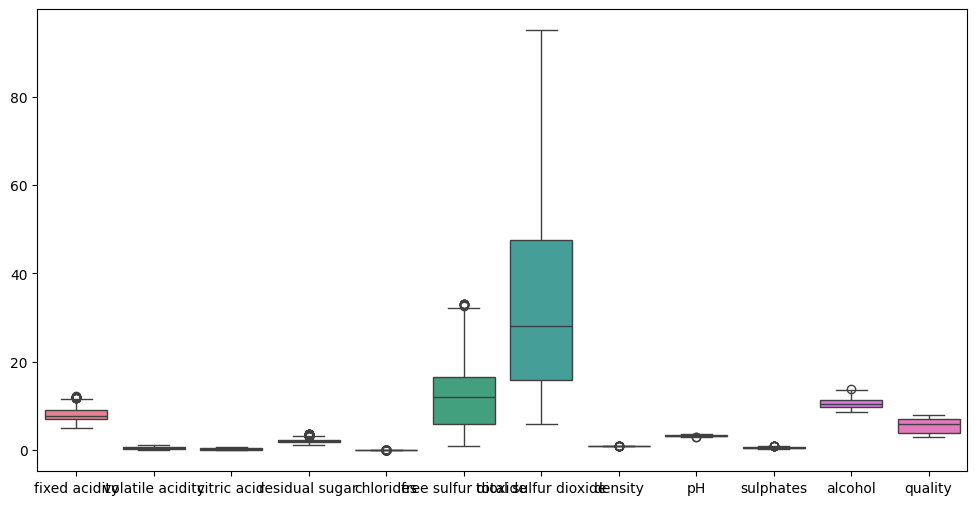

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

In [ ]:
def percent(cols , df):

    for col in cols:

        lowerbound = df[col].quantile(0.01)

        upperbound = df[col].quantile(0.99)



        df = df[(df[col] >= lowerbound) & (df[col] <= upperbound)]

    return df

In [ ]:
df = percent(n_col,df)

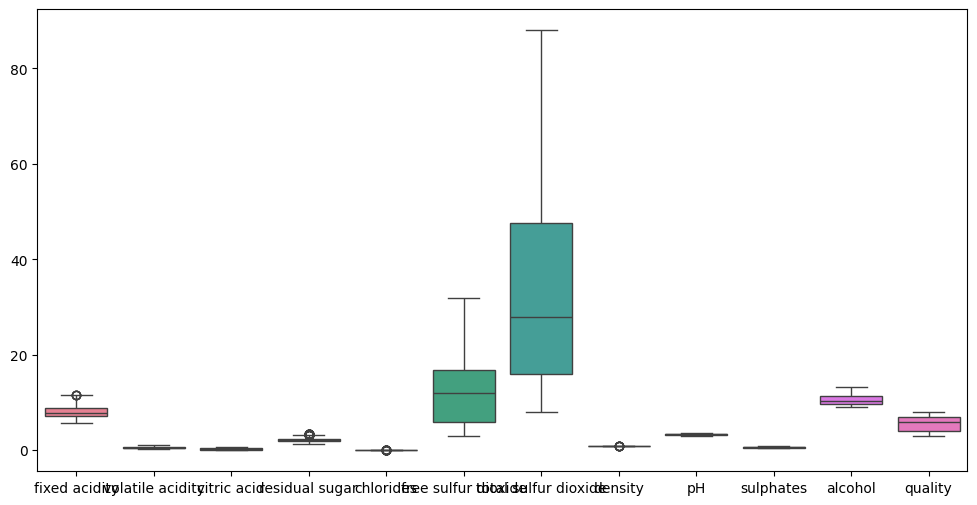

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

Data Distribution

In [ ]:
df['fixed acidity'].skew()

0.5847999097785572

In [ ]:
from scipy.stats import boxcox

df['fixed acidity'], lambda_boxcox = boxcox(df['fixed acidity'])

In [ ]:
df['volatile acidity'].skew()

0.47470980536432683

In [ ]:
print(df['volatile acidity'].describe())
print(df[df['volatile acidity']<=0])
print(f"Lambda: {lambda_boxcox}")

count    1694.000000
mean       -0.609709
std         0.369586
min        -1.383736
25%        -0.965337
50%        -0.575653
75%        -0.292173
max         0.160765
Name: volatile acidity, dtype: float64
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.911419         -0.353923     0.000000        1.900000   0.076000   
1          0.919490         -0.127479     0.000000        2.600000   0.098000   
2          0.919490         -0.272806     0.040000        2.300000   0.092000   
3          0.965490         -1.238374     0.560000        1.900000   0.075000   
4          0.911419         -0.353923     0.000000        1.900000   0.076000   
...             ...               ...          ...             ...        ...   
2893       0.928094         -0.900440     0.376067        1.776778   0.066374   
2894       0.920232         -1.019097     0.446906        3.460336   0.076080   
2895       0.931968         -0.744524     0.420977        2.1457

In [ ]:
df['citric acid'].skew()

0.12698759716436162

In [ ]:
df['citric acid'] = df['citric acid'] +1

In [ ]:
df['citric acid'], lambda_boxcox = boxcox(df['citric acid'])

In [ ]:
df['residual sugar'].skew()

0.8312798787704853

In [ ]:
df['residual sugar'], lambda_boxcox = boxcox(df['residual sugar'])

In [ ]:
n_col

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [ ]:
df['chlorides'].skew()

0.6334661969248199

In [ ]:
df['chlorides'], lambda_boxcox = boxcox(df['chlorides'])

In [ ]:
df['free sulfur dioxide'].skew()

0.7713261116622478

In [ ]:
df['free sulfur dioxide'], lambda_boxcox = boxcox(df['free sulfur dioxide'])

In [ ]:
df['total sulfur dioxide'].skew()

0.9060191348501706

In [ ]:
df['total sulfur dioxide'], lambda_boxcox = boxcox(df['total sulfur dioxide'])

In [ ]:
df['density'].skew()

0.11941371940295621

In [ ]:
df['density'], lambda_boxcox = boxcox(df['density'])

In [ ]:
df['sulphates'].skew()

0.6209985629196897

In [ ]:
df['sulphates'], lambda_boxcox = boxcox(df['sulphates'])

In [ ]:
df['alcohol'].skew()

0.4894671679765137

In [ ]:
df['pH'].skew()

0.38872591924358246

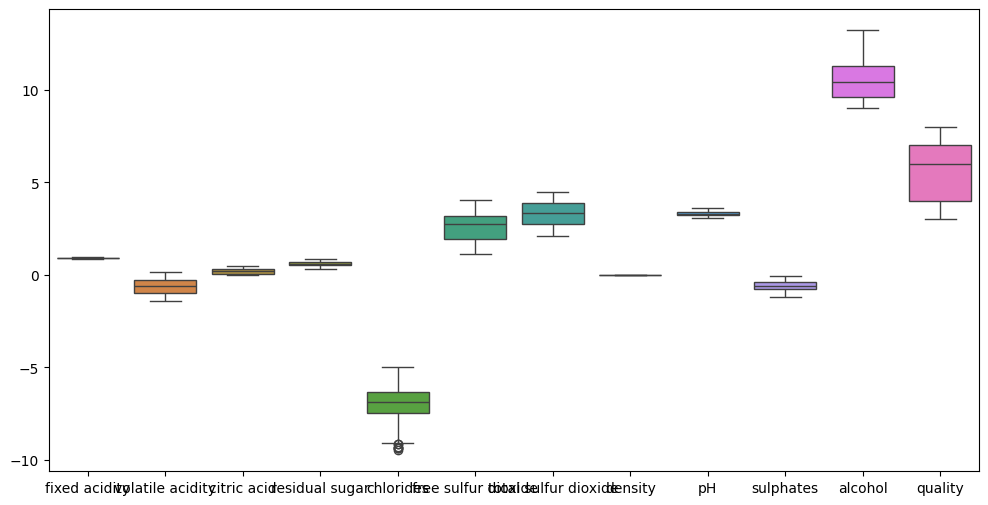

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(df)
plt.show()

Balancing Data

In [ ]:
x = df.drop(['quality'],axis=1)
y=df['quality']

In [ ]:
scaler = StandardScaler()

In [ ]:
x_sampled , y_sampled = smote.fit_resample(x,y)
df_sampled = pd.DataFrame(x_sampled, columns=x.columns)
df = pd.concat([df_sampled,y_sampled],axis=1)

In [ ]:
x = df.drop(['quality'],axis=1)
y=df['quality']

In [ ]:
x_scaler = scaler.fit_transform(x)

In [ ]:
y_scaler = MinMaxScaler()

In [ ]:
y.value_counts()

,count
quality,
5,338
6,338
7,338
4,338
8,338
3,338


Splitting

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x_scaler,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.model_selection import ShuffleSplit , cross_val_score
cv=ShuffleSplit(n_splits=5, test_size =0.2, random_state=42)
cross_val_score(LogisticRegression(max_iter=5000),x_scaler,y,cv=cv).mean()

0.6605911330049261

Model Training

Logistic Regression

In [ ]:
LR = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.9, fit_intercept = True, C = 10)

In [ ]:
LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=10, l1_ratio=0.9, penalty='elasticnet', solver='saga')

In [ ]:
LR_pred= LR.predict(x_test)

In [ ]:
accuracy_score(y_test,LR_pred)

0.6625615763546798

SVC

In [ ]:
svc =SVC(kernel = 'rbf', gamma = 'scale', C = 10)

In [ ]:
svc.fit(x_train,y_train)

SVC(C=10)

In [ ]:
svc_pred = svc.predict(x_test)

In [ ]:
accuracy_score(y_test,svc_pred)

0.8719211822660099

Decision Tree

In [ ]:
DT = DecisionTreeClassifier(min_samples_split = 2, min_samples_leaf = 1, max_depth= 50, criterion= 'entropy')

In [ ]:
DT.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50)

In [ ]:
DT_pred = DT.predict(x_test)

In [ ]:
accuracy_score(y_test,DT_pred)

0.8472906403940886

In [ ]:
RF = RandomForestClassifier(n_estimators = 500, min_samples_split = 2, min_samples_leaf = 2, max_depth= 20, bootstrap= False)

In [ ]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_leaf=2,
                       n_estimators=500)

In [ ]:
RF_pred = RF.predict(x_test)

In [ ]:
accuracy_score(y_test,RF_pred)

0.896551724137931

Gradient Boosting

In [ ]:
GB = GradientBoostingClassifier(subsample = 0.6, n_estimators = 500, min_samples_split = 2, min_samples_leaf = 1, max_depth= 7, learning_rate= 0.05)

In [ ]:
GB.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=7, n_estimators=500,
                           subsample=0.6)

In [ ]:
GB_pred = GB.predict(x_test)

In [ ]:
accuracy_score(y_test,GB_pred)

0.896551724137931

Kneighbors Classifier

In [ ]:
KN = KNeighborsClassifier(weights = 'distance', n_neighbors = 3, metric = 'manhattan')

In [ ]:
KN.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
KN_pred = KN.predict(x_test)

In [ ]:
accuracy_score(y_test,KN_pred)

0.8866995073891626

Evaluation

ROC-Curve




In [ ]:
models = {
    "Logistic Regression": LR,
    "Random Forest": RF,
    "Decision Tree": DT,
    "Kneighbors": KN,
    "Gradient Boosting": GB
}

In [ ]:
for model_name, model in models.items():
  if len(np.unique(y_test)) > 2:  # Multi-class case
          roc_auc = roc_auc_score(y_test, model.predict_proba(x_test), multi_class='ovr')
          print(f"ROC AUC for {model_name}: {roc_auc:.4f}")
  print("\n")

ROC AUC for Logistic Regression: 0.9173


ROC AUC for Random Forest: 0.9888


ROC AUC for Decision Tree: 0.9067


ROC AUC for Kneighbors: 0.9582


ROC AUC for Gradient Boosting: 0.9882




Overall ROC AUC for Logistic Regression: 0.9173



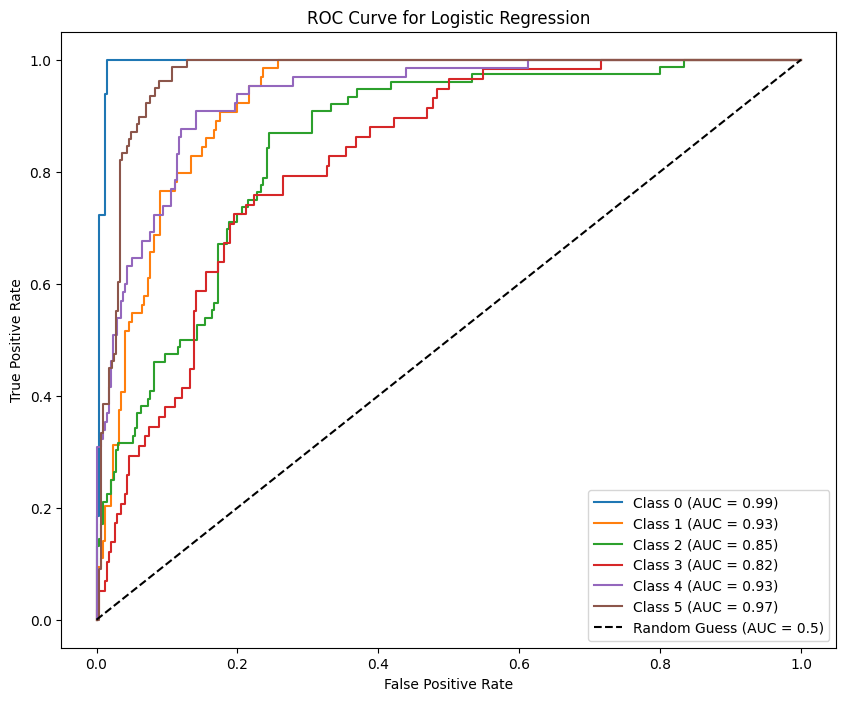

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = LR.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Logistic Regression: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.show()

Overall ROC AUC for Decision Tree: 0.9067



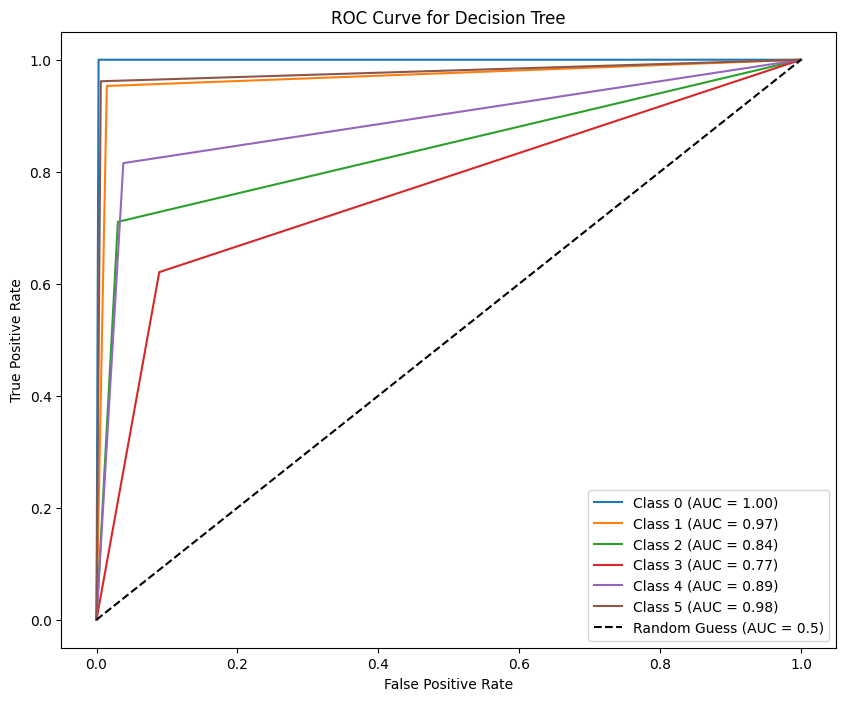

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = DT.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Decision Tree: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Decision Tree")
plt.legend(loc="lower right")
plt.show()

Overall ROC AUC for Random Forest: 0.9888



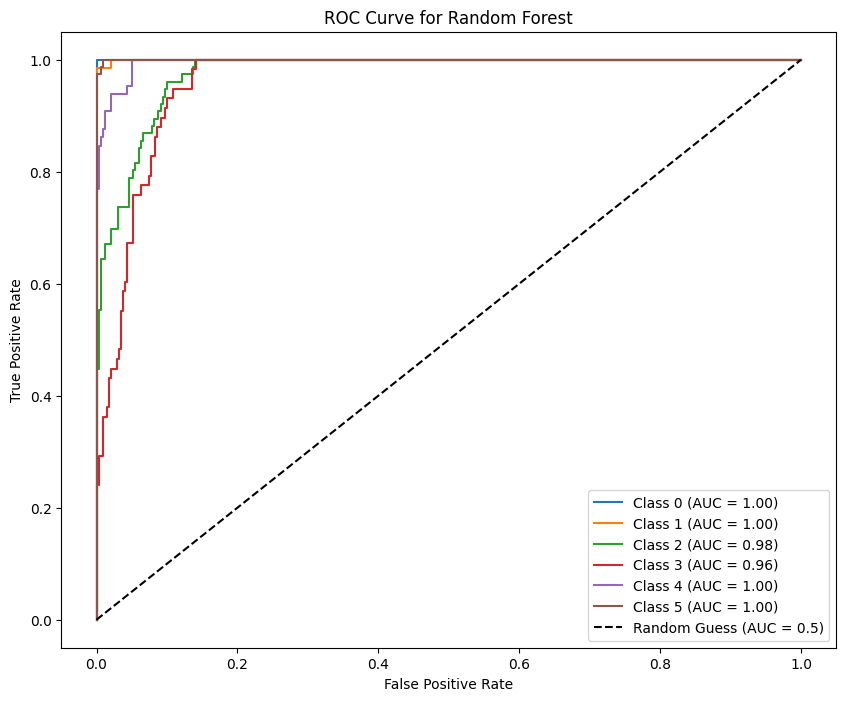

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = RF.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Random Forest: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.legend(loc="lower right")
plt.show()

Overall ROC AUC for Gradient Boosting Tree: 0.9882



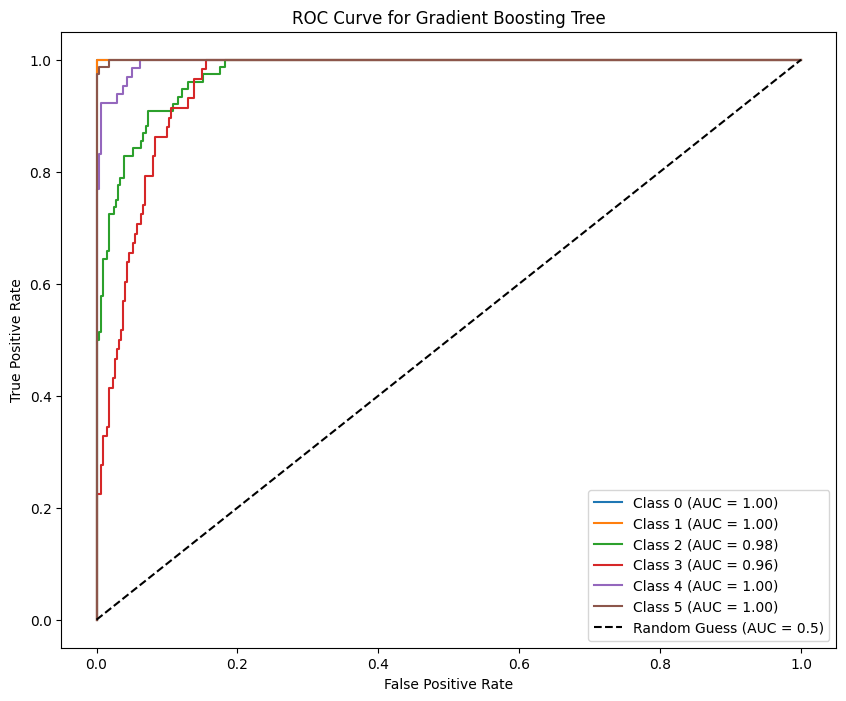

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = GB.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Gradient Boosting Tree: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradient Boosting Tree")
plt.legend(loc="lower right")
plt.show()

Overall ROC AUC for Support Vector Classifier Model: 0.9589



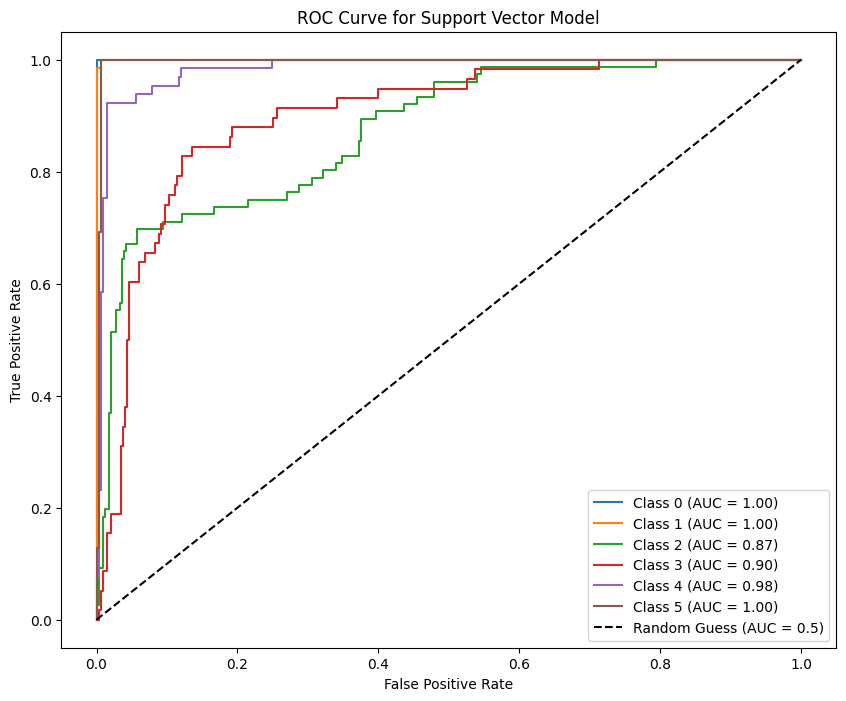

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = svc.decision_function(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Support Vector Classifier Model: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Support Vector Model")
plt.legend(loc="lower right")
plt.show()

Overall ROC AUC for Kneighbors Classifier: 0.9582



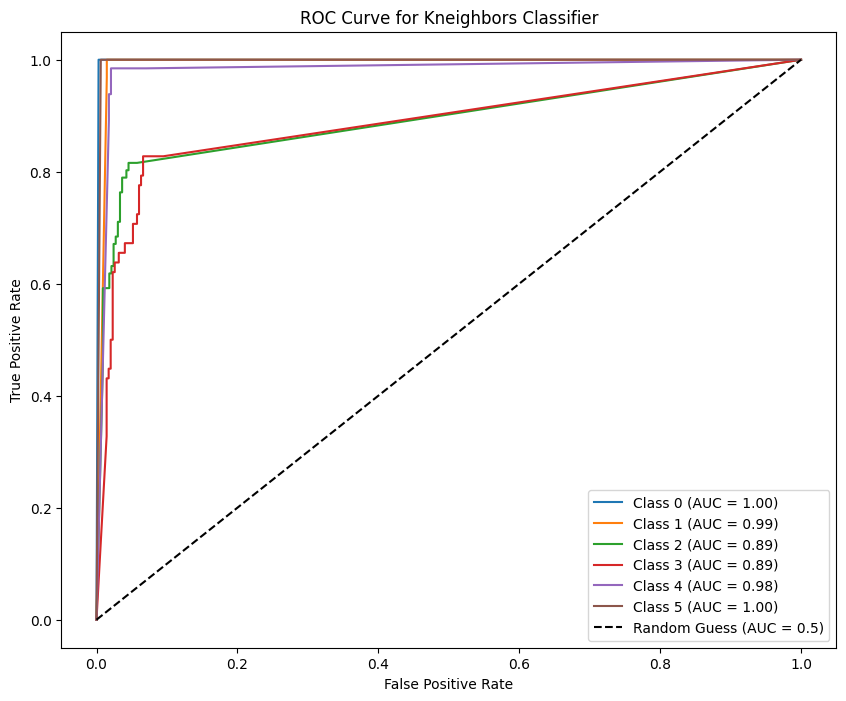

In [ ]:
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]
y_score = KN.predict_proba(x_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

overall_auc = roc_auc_score(y_test_binarized, y_score, multi_class="ovr")
print(f"Overall ROC AUC for Kneighbors Classifier: {overall_auc:.4f}\n")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Kneighbors Classifier")
plt.legend(loc="lower right")
plt.show()

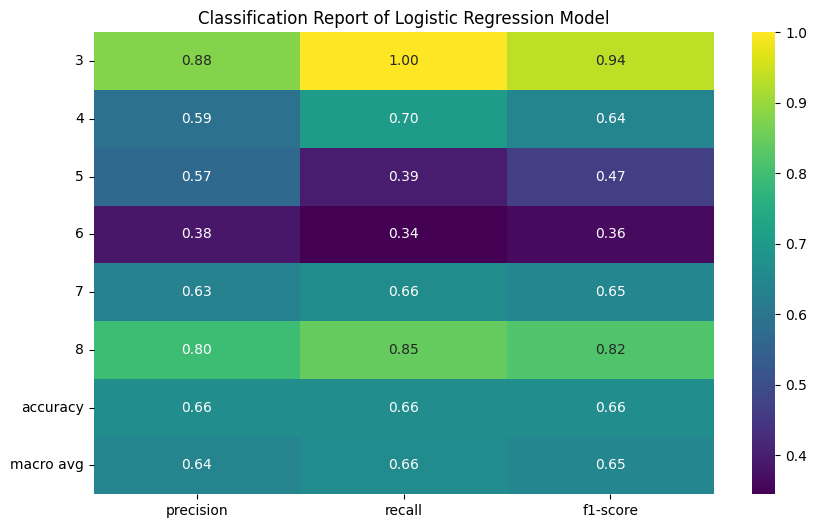

In [ ]:
LR_report = classification_report(y_test, LR_pred, output_dict=True)
# Convert the classification report to a DataFrame
LR_report_df = pd.DataFrame(LR_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(LR_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Logistic Regression Model")
plt.show()

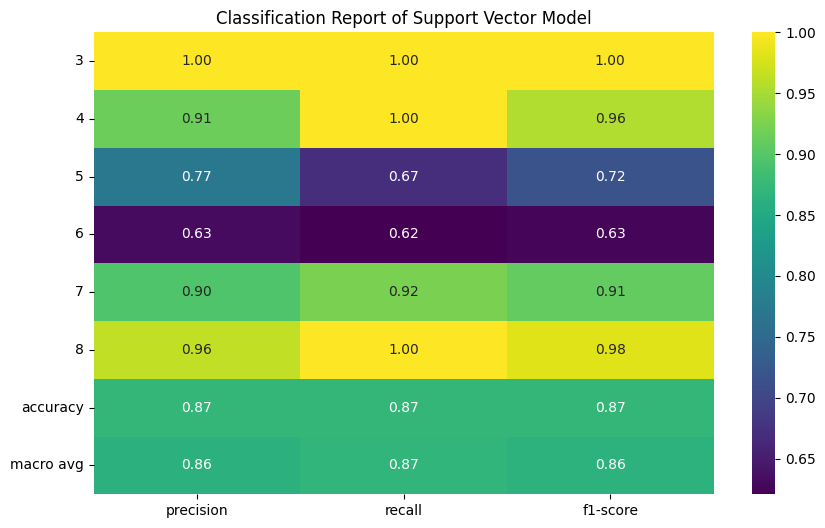

In [ ]:
svc_report = classification_report(y_test, svc_pred, output_dict=True)
# Convert the classification report to a DataFrame
svc_report_df = pd.DataFrame(svc_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(svc_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Support Vector Model")
plt.show()

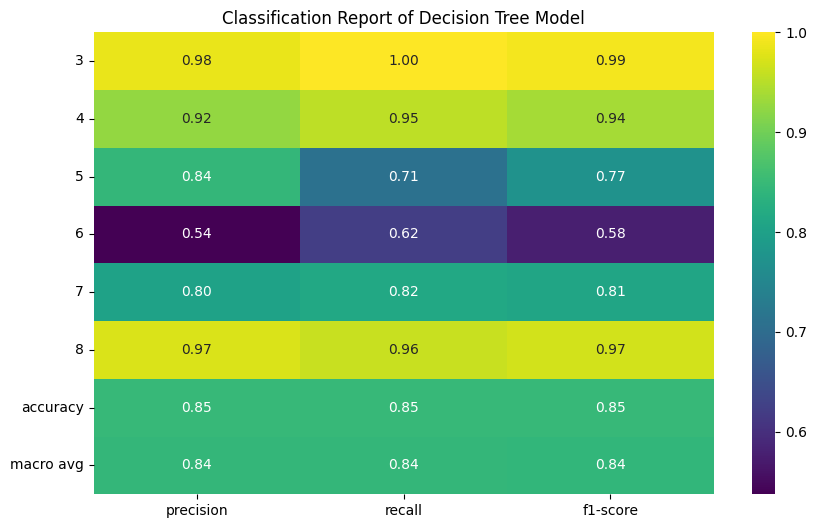

In [ ]:
DT_report = classification_report(y_test, DT_pred, output_dict=True)
# Convert the classification report to a DataFrame
DT_report_df = pd.DataFrame(DT_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(DT_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Decision Tree Model")
plt.show()

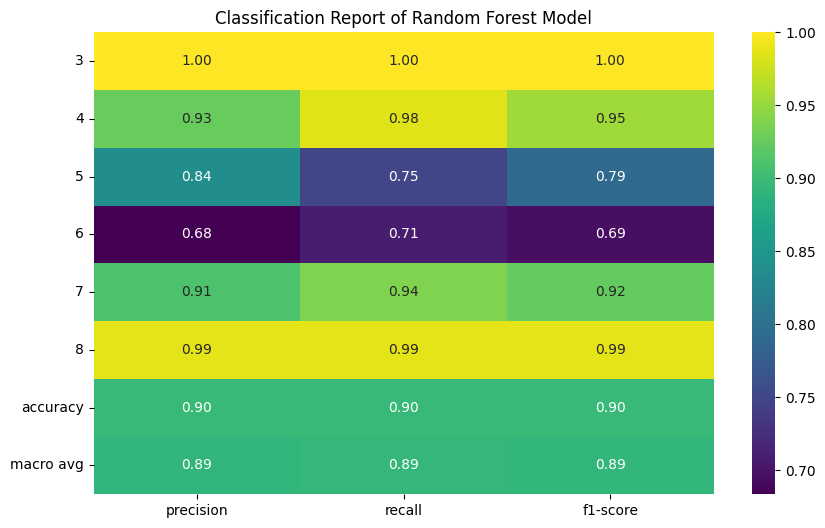

In [ ]:
RF_report = classification_report(y_test, RF_pred, output_dict=True)
# Convert the classification report to a DataFrame
RF_report_df = pd.DataFrame(RF_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(RF_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Random Forest Model")
plt.show()

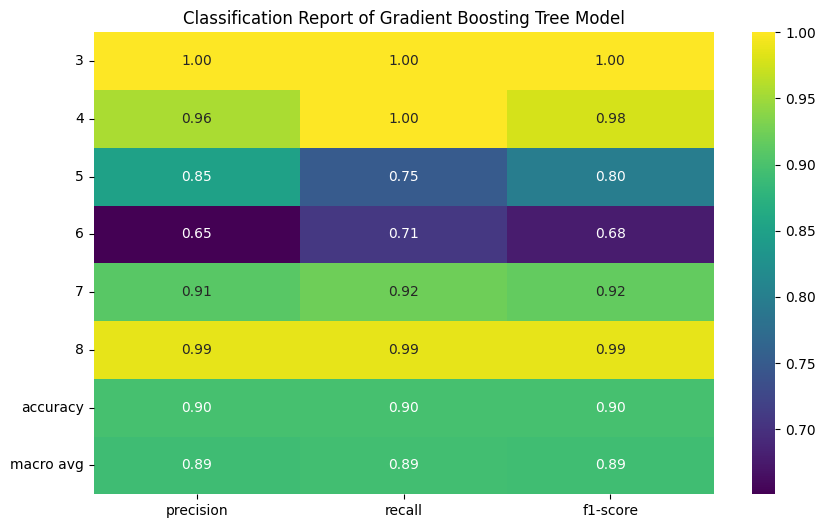

In [ ]:
GB_report = classification_report(y_test, GB_pred, output_dict=True)
# Convert the classification report to a DataFrame
GB_report_df = pd.DataFrame(GB_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(GB_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Gradient Boosting Tree Model")
plt.show()

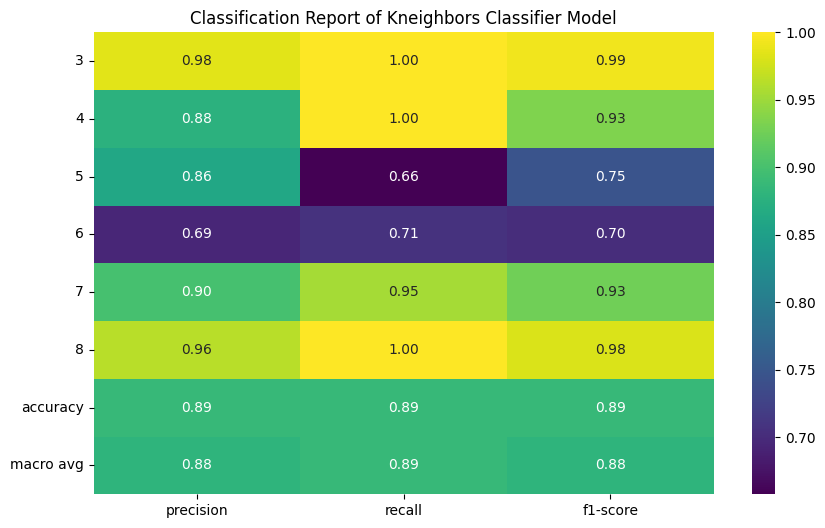

In [ ]:
KN_report = classification_report(y_test, KN_pred, output_dict=True)
# Convert the classification report to a DataFrame
KN_report_df = pd.DataFrame(KN_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(KN_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Kneighbors Classifier Model")
plt.show()

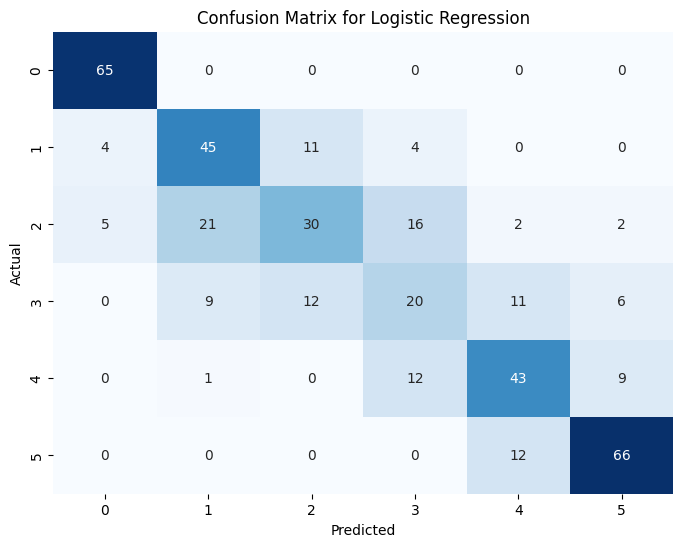

In [ ]:
cm = confusion_matrix(y_test, LR_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

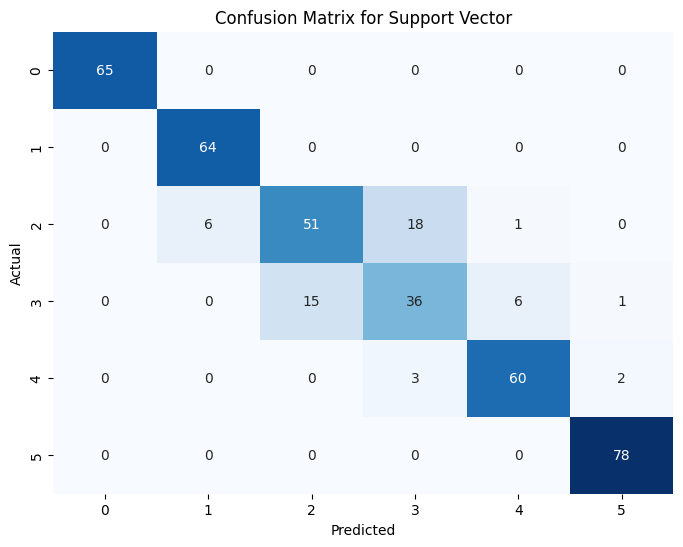

In [ ]:
cm = confusion_matrix(y_test, svc_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Support Vector')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

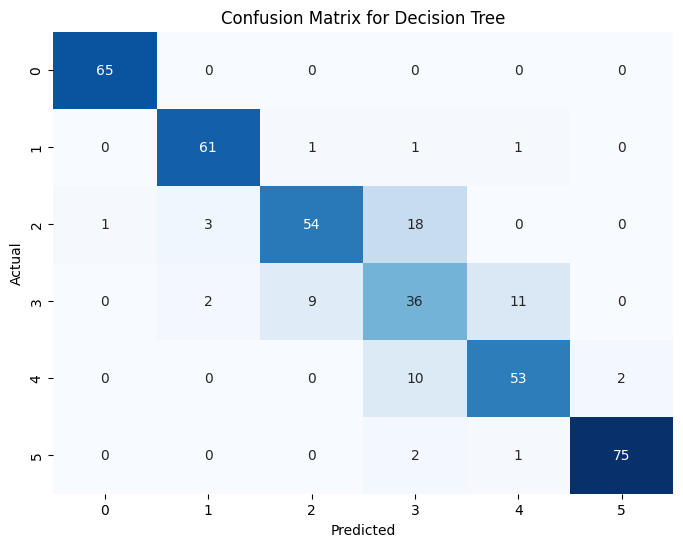

In [ ]:
cm = confusion_matrix(y_test, DT_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

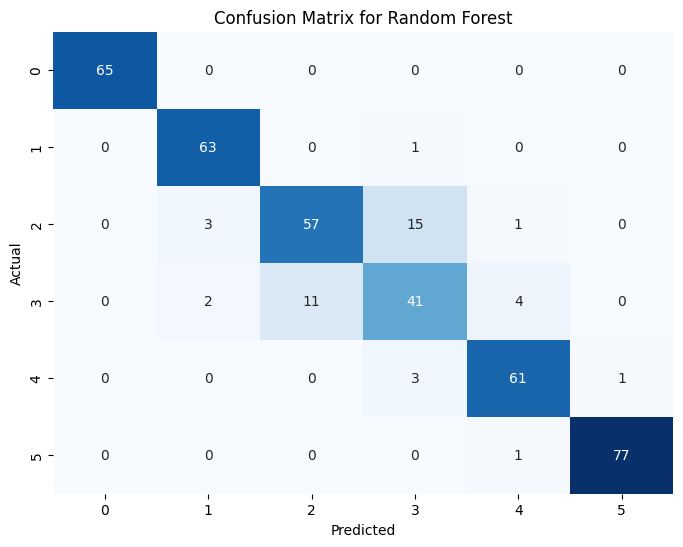

In [ ]:
cm = confusion_matrix(y_test, RF_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

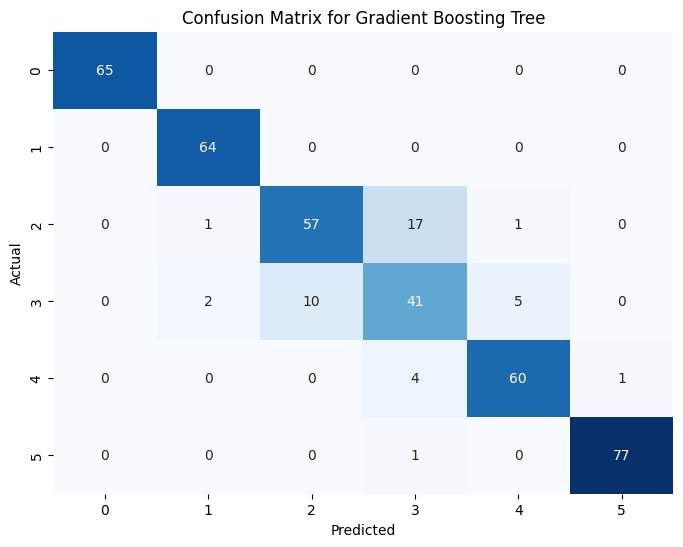

In [ ]:
cm = confusion_matrix(y_test, GB_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Gradient Boosting Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Confusion Matrix

Logistic Regression

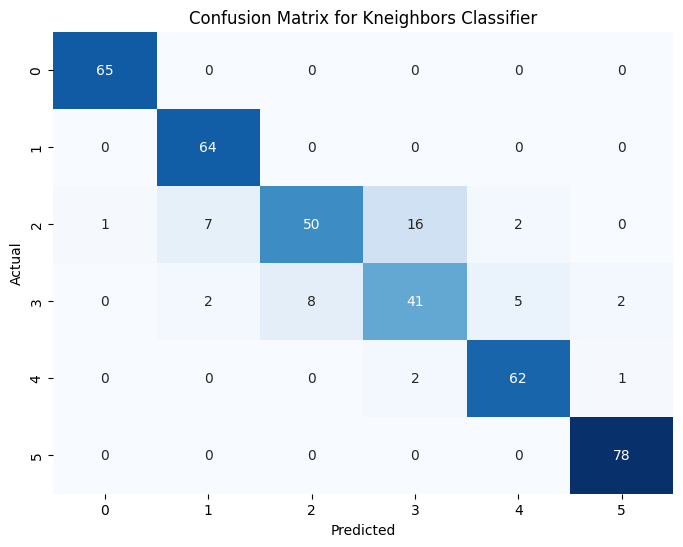

In [ ]:
cm = confusion_matrix(y_test, KN_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',cbar=False)
plt.title('Confusion Matrix for Kneighbors Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Accuracy

<ipython-input-114-6ddb8814153a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


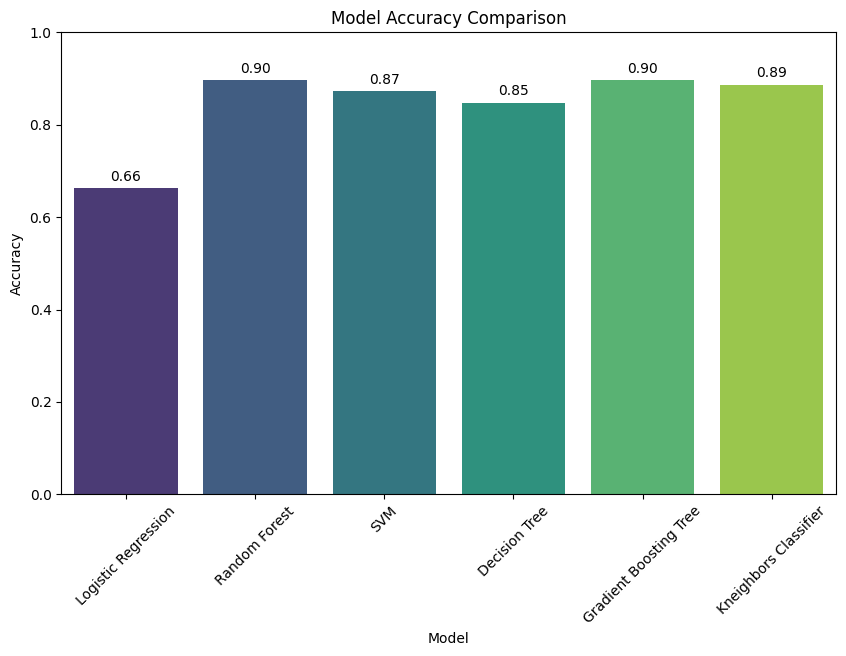

In [ ]:
models = {
    'Logistic Regression': LR,
    'Random Forest': RF,
    'SVM': svc,
    'Decision Tree': DT,
    'Gradient Boosting Tree': GB,
    'Kneighbors Classifier': KN
}
accuracies = {}

for model_name, model in models.items():
    y_test_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies[model_name] = accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")

for i, (model_name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()